In [27]:
import pandas as pd

# Indlæser datasæt i CSV format
file_path = 'novo_reviews.csv'
df = pd.read_csv(file_path, encoding='UTF-8')

# Viser de fem første rækker i datasættet
df.head(30)

,Dato,Status,Rating,Positive Kommentarer,Kritikpunkter
0,8. oktober 2024,Nuværende medarbejder,3,Gode kollegaer; Spændende arbejde; Gode udvikl...,Micro management; Sladderkultur blandt ledere;...
1,5. oktober 2024,Nuværende medarbejder,3,Den har et godt ry,Dårlig ledelse; Ingen work/life balance; Psyko...
2,24. september 2024,Nuværende medarbejder,1,Mange muligheder; Stort fokus på trivsel,Stor skude at vende ift. strategisk retning
3,14. september 2024,Nuværende medarbejder,5,Fantastisk at arbejde i så succesfuld virksomh...,Novo Nordisk er blevet for stor; Bureaukratiet...
4,31. juli 2024,Tidligere medarbejder,3,Gode arbejdsomme kollegaer; Spændende opgaver ...,Amerikaniseret; Dårlig ledelse; Micro manageme...
5,15. juni 2024,Nuværende medarbejder,2,Dygtige og søde medarbejdere; Spændende opgave...,velbeskrevet; God balance mellem fritid og ar...
6,14. juni 2024,Tidligere medarbejder,3,Man kan lande i gode afdelinger,så er arbejdet ret ok.
7,14. juni 2024,Tidligere medarbejder,3,God ledelse; Gode værdier; Purpose; Masser af ...,Stor organisation; Tager lang tid at lære ting...
8,5. juni 2024,Nuværende medarbejder,5,Lot of job opportunities,Salary is lower compare to the other companies...
9,13. marts 2024,Nuværende medarbejder,5,Mange dygtige medarbejdere; Super produkter; S...,Topstyret virksomhed; Micromanagement i produk...


In [28]:
!pip install textblob
!pip install googletrans==4.0.0-rc1

# Importerer biblioteker til Sentimentanalyse
from textblob import TextBlob
from googletrans import Translator
import numpy as np

# Oversættelse
translator = Translator()

def get_sentiment(text):
    try:
        # Oversætter dansk tekst til engelsk
        translated = translator.translate(text, src='da', dest='en').text
        # Den oversatte tekst analyseres med TextBlob, som returnerer en polaritetsscore mellem -1 (meget negativ) og 1 (meget positiv).
        return TextBlob(translated).sentiment.polarity
    # Hvis der opstår en fejl (f.eks. tom tekst eller problemer med oversættelsen), returneres np.nan (en manglende værdi).
    except:
        return np.nan

# Her udføres Sentimentanalysen
df['Positive_Sentiment'] = df['Positive Kommentarer'].apply(get_sentiment)
df['Kritik_Sentiment'] = df['Kritikpunkter'].apply(get_sentiment)

# Beregner gennemsnitlige sentimentværdier
avg_pos = df['Positive_Sentiment'].mean()
avg_neg = df['Kritik_Sentiment'].mean()

# Gennemsnitlige sentimentværdier udskrives til terminalen
print("Gennemsnitlig sentiment score:")
print(f"Positive kommentarer: {avg_pos:.3f}")
print(f"Kritikpunkter: {avg_neg:.3f}")

# Gem resultater
df.to_csv('novo_nordisk_sentiment_analysis.csv', index=False, encoding='utf-8')

# Vis resultater med både original tekst og sentiment scores
print("Eksempler på sentiment analyse:")
print(df[['Positive Kommentarer', 'Positive_Sentiment', 'Kritikpunkter', 'Kritik_Sentiment']].head(31))


Gennemsnitlig sentiment score:
Positive kommentarer: 0.542
Kritikpunkter: 0.044
Eksempler på sentiment analyse:
                                 Positive Kommentarer  Positive_Sentiment  \
0   Gode kollegaer; Spændende arbejde; Gode udvikl...            0.700000   
1                                  Den har et godt ry            0.700000   
2            Mange muligheder; Stort fokus på trivsel            0.500000   
3   Fantastisk at arbejde i så succesfuld virksomh...            0.516667   
4   Gode arbejdsomme kollegaer; Spændende opgaver ...            0.700000   
5   Dygtige og søde medarbejdere; Spændende opgave...            0.450000   
6                     Man kan lande i gode afdelinger            0.700000   
7   God ledelse; Gode værdier; Purpose; Masser af ...            0.700000   
8                            Lot of job opportunities            0.000000   
9   Mange dygtige medarbejdere; Super produkter; S...            0.600000   
10                    Rigelige investerin

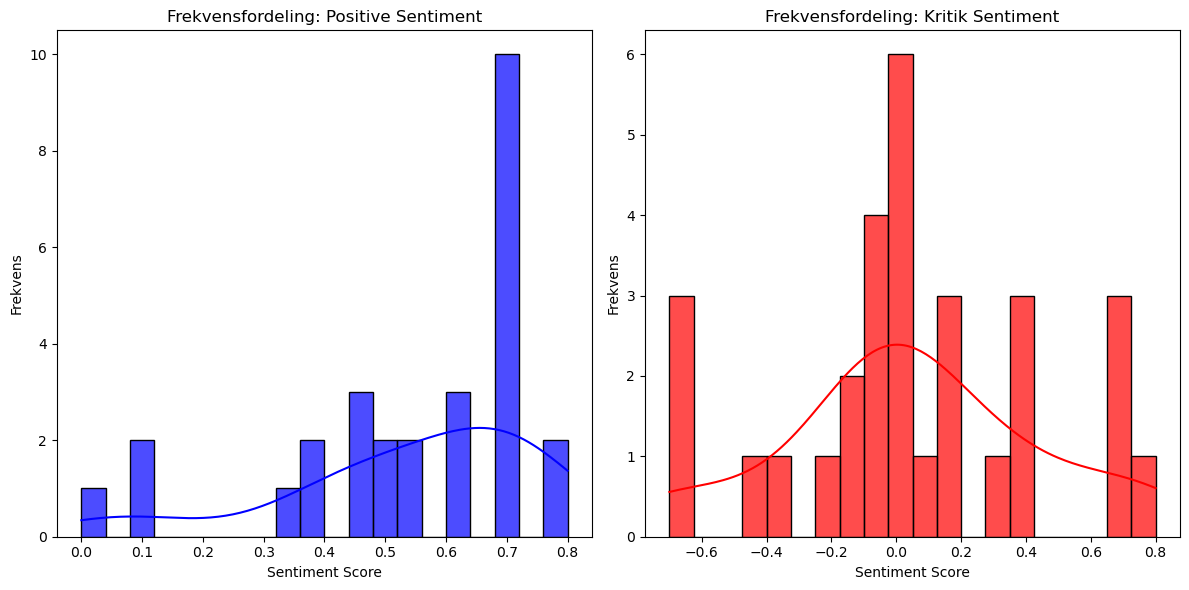

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot frekvensfordelingen for positive og kritik-sentimenter
plt.figure(figsize=(12, 6))

# Subplot 1: Positive Sentiment
plt.subplot(1, 2, 1)
sns.histplot(df['Positive_Sentiment'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Frekvensfordeling: Positive Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frekvens')

# Subplot 2: Kritik Sentiment
plt.subplot(1, 2, 2)
sns.histplot(df['Kritik_Sentiment'], bins=20, kde=True, color='red', alpha=0.7)
plt.title('Frekvensfordeling: Kritik Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frekvens')

# Juster layout
plt.tight_layout()
plt.show()




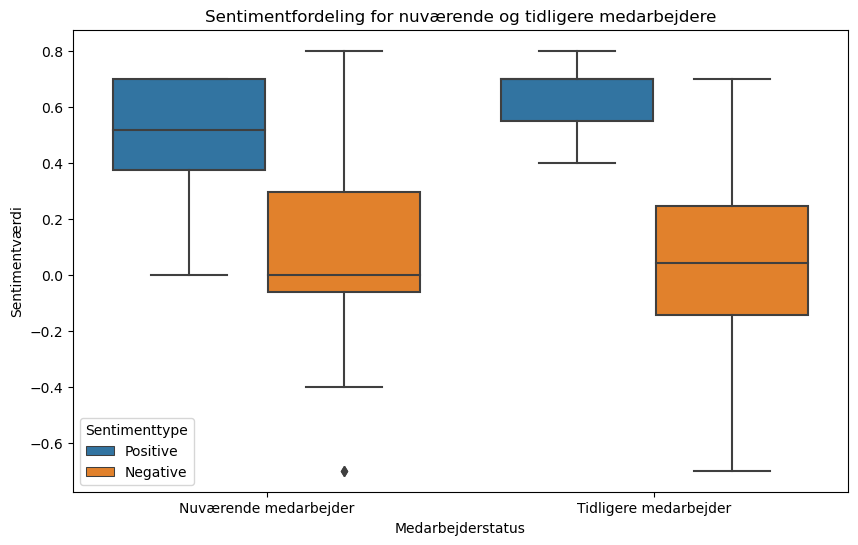

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from googletrans import Translator
import numpy as np

# Boksplot af sentimentfordeling mellem nuværende og tidligere medarbejdere
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medarbejderstatus', y='Sentimentværdi', hue='Sentimenttype', data=sentiment_df, order=['Nuværende medarbejder', 'Tidligere medarbejder'], hue_order=['Positive', 'Negative'])
plt.title('Sentimentfordeling for nuværende og tidligere medarbejdere')
plt.xlabel('Medarbejderstatus')
plt.ylabel('Sentimentværdi')
plt.legend(title='Sentimenttype')
plt.show()